In [4]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import os
import matplotlib.widgets as mpwidgets

In [2]:
DATA_PARENT_DIR = '../Task1/brain/'
iterable_dir_list = sorted(os.listdir(DATA_PARENT_DIR), key=lambda x: x)
dataset_parent_dir = [os.path.join(DATA_PARENT_DIR, mri_path) for mri_path in iterable_dir_list]

In [14]:
type(mr)

numpy.ndarray

In [16]:
%matplotlib ipympl

def overlay_3d_plot(mr: np.ndarray, ct: np.ndarray) -> None:
    OPACITY = 0.5
    SLICE_NUMBER = mr.shape[1] // 2

    # PLOT
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [5, 1, 1]})
    img0 = ax0.imshow(mr[:,SLICE_NUMBER,:], cmap="gray")
    img1 = ax0.imshow(ct[:,SLICE_NUMBER,:], alpha=OPACITY, cmap="gray")


    def update_opacity(value): 
        img1.set_alpha(value)    
        fig.canvas.draw_idle()

    def update_slice(value): 
        slice_idx = int(value)
        img0.set_data(mr[:, slice_idx, :])
        img1.set_data(ct[:, slice_idx, :])
        fig.canvas.draw_idle()

    slider0 = mpwidgets.Slider(ax=ax1, label='opacity', valmin=0, valmax=1, valinit=OPACITY)
    slider0.on_changed(update_opacity)

    slider1 = mpwidgets.Slider(ax=ax2, label='slice', valmin=0, valmax=mr.shape[1] - 1, valinit=SLICE_NUMBER)
    slider1.on_changed(update_slice)

    plt.show()

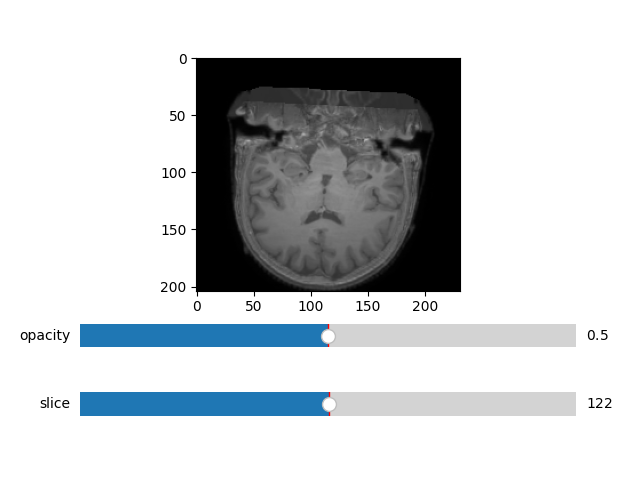

In [19]:
mr = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[0], 'mr.nii.gz')))
ct = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[0], 'ct.nii.gz')))
overlay_3d_plot(mr, ct)


